# Zadanie 2

## PBIL

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def init_prob_vec(d):
    p = np.zeros(d)
    for k in range(d):
        p[k] = 0.5
    return p

In [3]:
def binary_random(p):
    if np.random.rand() < p:
        z = 1
    else:
        z = 0
    return z

In [4]:
def random_individual(p, d):
    x = np.zeros(d, dtype=int)
    for k in range(d):
        x[k] = binary_random(p[k])
    return x

In [5]:
def random_population(p, N, d):
    population = np.zeros((N, d))
    for k in range (N):
        population[k] = random_individual(p, d)
    return population

In [6]:
def population_evaluation(population, F, N):
    evaluation = np.zeros(N)
    for k in range(N):
        evaluation[k] = F(population[k])
    return evaluation

In [7]:
def best_individual(population, evaluation):
    max_idx = np.argmax(evaluation)
    return (population[max_idx], np.sum(population[max_idx]))

d - chromosome length  
N - population size  
T - number of iterations  
theta1 - learning rate  
theta2 - probability of mutation  
theta3 - mutation disorder rate  
F - objective function  

In [8]:
def pbil(d, N, T, theta1, theta2, theta3, F):
    t0 = time.time()
    
    results = []
    p = init_prob_vec(d)
    population = random_population(p, N, d)
    evaluation = population_evaluation(population, F, N)
    for t in range(T):
        best = best_individual(population, evaluation)
        x = best[0]
        results.append(best[1])
        print(f'Best individual in iteration nr {t}: \t {x}')
        for k in range(d):
            p[k] = p[k] * (1 - theta1) + x[k] * theta1
        for k in range(d):
            if np.random.rand() < theta2:
                p[k] = p[k] * (1 - theta3) + binary_random(0.5) * theta3
        population = random_population(p, N, d)
        evaluation = population_evaluation(population, F, N)
        
    print(time.time() - t0, best[0])
    return results

In [9]:
def show_plt(results, d, N, T, theta1, theta2, theta3):
    title = 'd = ' + str(d) + ', N = ' + str(N) + ', T = ' + str(T) + ', theta1 = ' + str(theta1) + ', theta2 = ' + str(theta2) + ', theta3 = ' + str(theta3)
    plt.figure()
    plt.plot(results)
    plt.title(title)
    plt.xlabel("iteration number")
    plt.ylabel("objective function value")
    plt.xlim((0, T-1))
    plt.show()

### OneMax

In [10]:
def one_max(x):
    return np.sum(x)

In [11]:
results = pbil(20, 20, 50, 0.1, 0.05, 0.01, one_max)

Best individual in iteration nr 0: 	 [0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.]
Best individual in iteration nr 1: 	 [1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
Best individual in iteration nr 2: 	 [0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
Best individual in iteration nr 3: 	 [1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
Best individual in iteration nr 4: 	 [1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
Best individual in iteration nr 5: 	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.]
Best individual in iteration nr 6: 	 [1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
Best individual in iteration nr 7: 	 [1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Best individual in iteration nr 8: 	 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
Best individual in iteration nr 9: 	 [1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
Best indiv

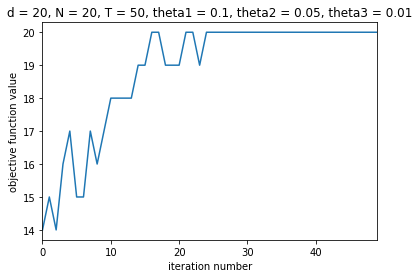

In [12]:
show_plt(results, 20, 20, 50, 0.1, 0.05, 0.01)

In [12]:
results = pbil(40, 20, 50, 0.1, 0.05, 0.01, one_max)

0.05898165702819824 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


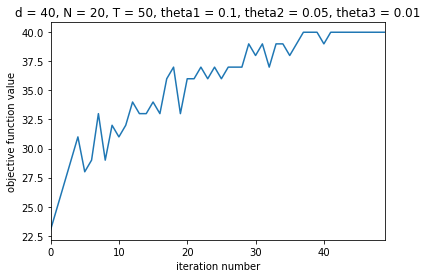

In [13]:
show_plt(results, 40, 20, 50, 0.1, 0.05, 0.01)

In [14]:
results = pbil(20, 50, 50, 0.1, 0.05, 0.01, one_max)

0.08398890495300293 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


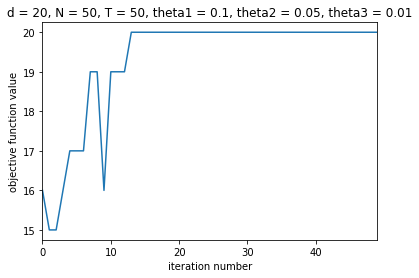

In [15]:
show_plt(results, 20, 50, 50, 0.1, 0.05, 0.01)

In [16]:
results = pbil(20, 20, 100, 0.1, 0.05, 0.01, one_max)

0.06799578666687012 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


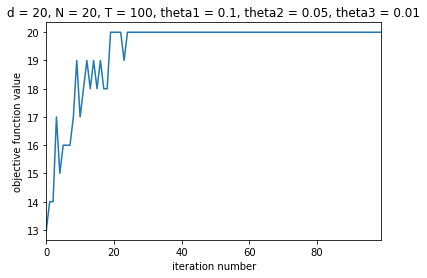

In [17]:
show_plt(results, 20, 20, 100, 0.1, 0.05, 0.01)

In [19]:
results = pbil(20, 20, 50, 0.5, 0.05, 0.01, one_max)

0.03598833084106445 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


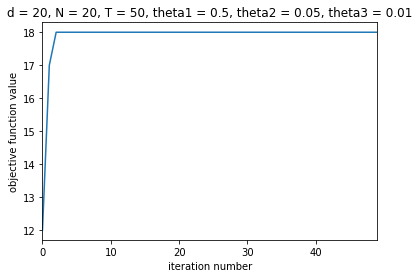

In [20]:
show_plt(results, 20, 20, 50, 0.5, 0.05, 0.01)

In [31]:
results = pbil(20, 20, 50, 0.1, 0.25, 0.01, one_max)

0.0369873046875 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


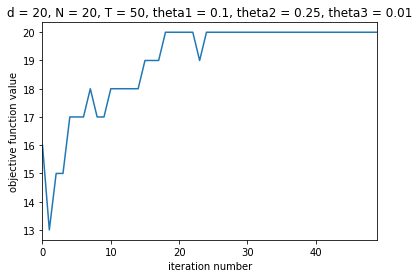

In [32]:
show_plt(results, 20, 20, 50, 0.1, 0.25, 0.01)

In [33]:
results = pbil(20, 20, 50, 0.1, 0.05, 0.5, one_max)

0.03597068786621094 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


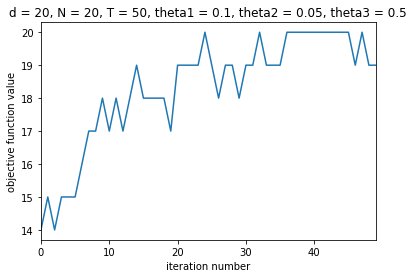

In [34]:
show_plt(results, 20, 20, 50, 0.1, 0.05, 0.5)

### DeceptiveOneMax

In [36]:
def deceptive_one_max(x):
    if np.count_nonzero(x) == 0:
        return len(x) + 1
    else:
        return np.sum(x)

In [210]:
results = pbil(20, 20, 50, 0.1, 0.05, 0.01, deceptive_one_max)

0.039003849029541016 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


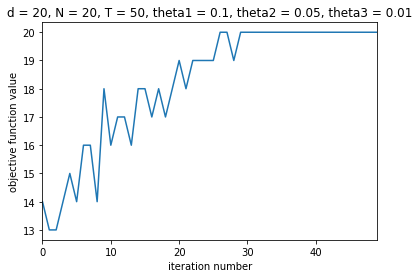

In [211]:
show_plt(results, 20, 20, 50, 0.1, 0.05, 0.01)

In [37]:
results = pbil(40, 20, 50, 0.1, 0.05, 0.01, deceptive_one_max)

0.0619966983795166 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


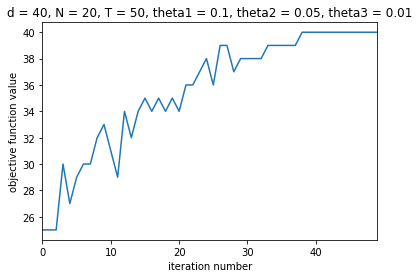

In [38]:
show_plt(results, 40, 20, 50, 0.1, 0.05, 0.01)

In [39]:
results = pbil(20, 50, 50, 0.1, 0.05, 0.01, deceptive_one_max)

0.08397269248962402 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


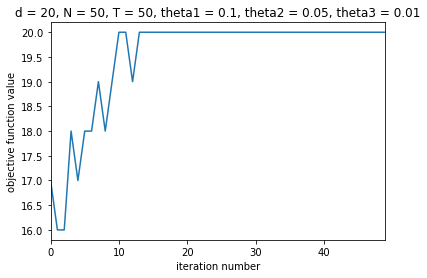

In [40]:
show_plt(results, 20, 50, 50, 0.1, 0.05, 0.01)

In [41]:
results = pbil(20, 20, 100, 0.1, 0.05, 0.01, deceptive_one_max)

0.07997369766235352 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


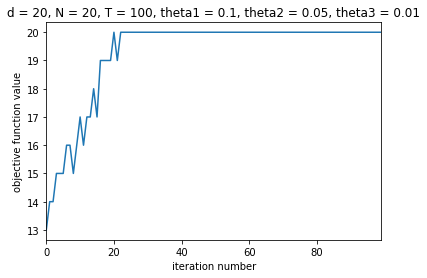

In [42]:
show_plt(results, 20, 20, 100, 0.1, 0.05, 0.01)

In [43]:
results = pbil(20, 20, 50, 0.5, 0.05, 0.01, deceptive_one_max)

0.03600573539733887 [0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


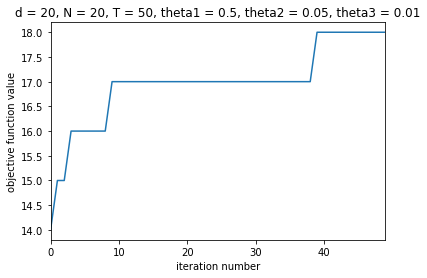

In [44]:
show_plt(results, 20, 20, 50, 0.5, 0.05, 0.01)

In [45]:
results = pbil(20, 20, 50, 0.1, 0.25, 0.01, deceptive_one_max)

0.03700590133666992 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


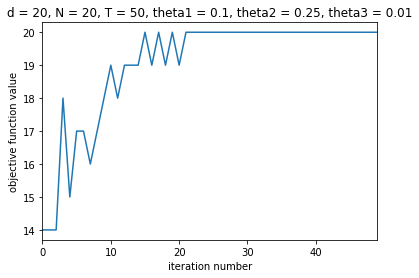

In [47]:
show_plt(results, 20, 20, 50, 0.1, 0.25, 0.01)

In [48]:
results = pbil(20, 20, 50, 0.1, 0.05, 0.5, deceptive_one_max)

0.0369875431060791 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


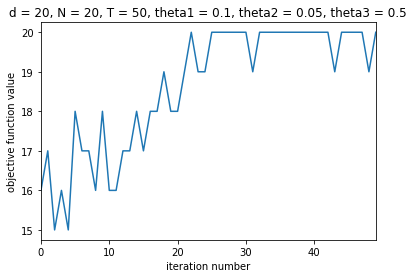

In [49]:
show_plt(results, 20, 20, 50, 0.1, 0.05, 0.5)

### K-DeceptiveOneMax

In [50]:
def k_deceptive_one_max(x, k):
    i = 0
    j = k
    res = 0
    for _ in range(0, len(x), k):
        res += deceptive_one_max(x[i:j])
        i += k
        j += k
    return res         

In [51]:
def population_evaluation_k(population, F, N, k):
    evaluation = np.zeros(N)
    for i in range(N):
        evaluation[i] = F(population[i], k)
    return evaluation

In [52]:
def pbil_k(d, N, T, theta1, theta2, theta3, F, k):
    t0 = time.time()
    
    results = []
    p = init_prob_vec(d)
    population = random_population(p, N, d)
    evaluation = population_evaluation_k(population, F, N, k)
    for t in range(T):
        best = best_individual(population, evaluation)
        x = best[0]
        results.append(best[1])
#         print(f'Best individual in iteration nr {t}: \t {x}')
        for i in range(d):
            p[i] = p[i] * (1 - theta1) + x[i] * theta1
        for i in range(d):
            if np.random.rand() < theta2:
                p[i] = p[i] * (1 - theta3) + binary_random(0.5) * theta3
        population = random_population(p, N, d)
        evaluation = population_evaluation_k(population, F, N, k)
        
    print(time.time() - t0, best[0])
    return results

In [53]:
def show_plt_k(results, d, N, T, theta1, theta2, theta3, k):
    title = 'd = ' + str(d) + ', N = ' + str(N) + ', T = ' + str(T) + ', theta1 = ' + str(theta1) + ', theta2 = ' + str(theta2) + ', theta3 = ' + str(theta3) + ', k = ' + str(k)
    plt.figure()
    plt.plot(results)
    plt.title(title)
    plt.xlabel("iteration number")
    plt.ylabel("objective function value")
    plt.xlim((0, T-1))
    plt.show()

In [230]:
results = pbil_k(20, 20, 50, 0.1, 0.05, 0.01, k_deceptive_one_max, 7)

0.05298185348510742 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


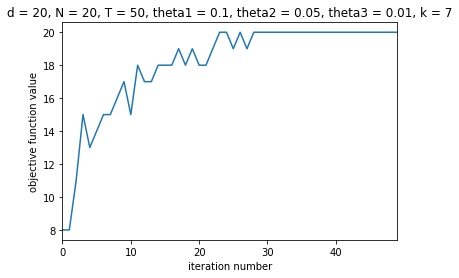

In [231]:
show_plt_k(results, 20, 20, 50, 0.1, 0.05, 0.01, 7)

In [54]:
results = pbil_k(40, 20, 50, 0.1, 0.05, 0.01, k_deceptive_one_max, 7)

0.09198737144470215 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


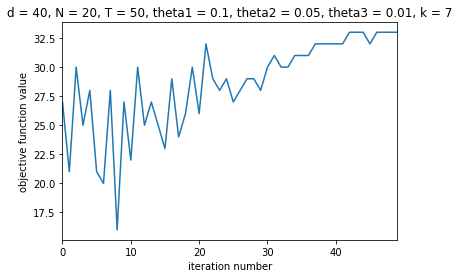

In [55]:
show_plt_k(results, 40, 20, 50, 0.1, 0.05, 0.01, 7)

In [56]:
results = pbil_k(20, 50, 50, 0.1, 0.05, 0.01, k_deceptive_one_max, 7)

0.12096118927001953 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


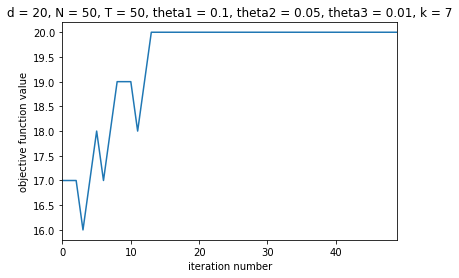

In [57]:
show_plt_k(results, 20, 50, 50, 0.1, 0.05, 0.01, 7)

In [58]:
results = pbil_k(20, 20, 100, 0.1, 0.05, 0.01, k_deceptive_one_max, 7)

0.09996867179870605 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


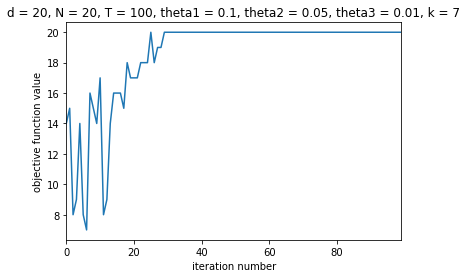

In [59]:
show_plt_k(results, 20, 20, 100, 0.1, 0.05, 0.01, 7)

In [60]:
results = pbil_k(20, 20, 50, 0.5, 0.05, 0.01, k_deceptive_one_max, 7)

0.05200076103210449 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


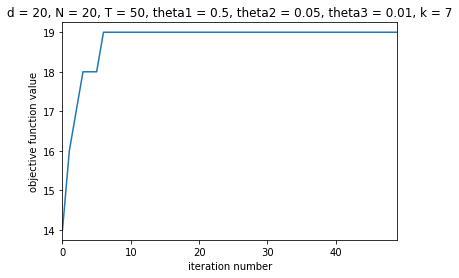

In [61]:
show_plt_k(results, 20, 20, 50, 0.5, 0.05, 0.01, 7)

In [62]:
results = pbil_k(20, 20, 50, 0.1, 0.25, 0.01, k_deceptive_one_max, 7)

0.052484989166259766 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


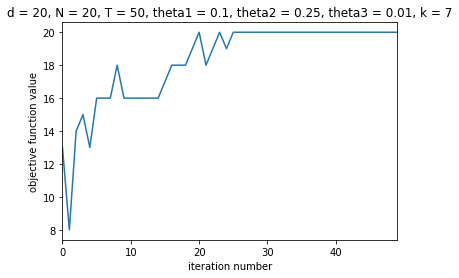

In [63]:
show_plt_k(results, 20, 20, 50, 0.1, 0.25, 0.01, 7)

In [64]:
results = pbil_k(20, 20, 50, 0.1, 0.05, 0.5, k_deceptive_one_max, 7)

0.05208635330200195 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


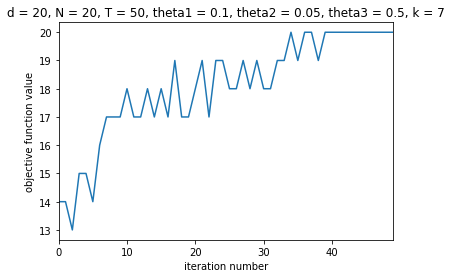

In [65]:
show_plt_k(results, 20, 20, 50, 0.1, 0.05, 0.5, 7)

In [66]:
results = pbil_k(20, 20, 50, 0.1, 0.05, 0.01, k_deceptive_one_max, 4)

0.05699920654296875 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]


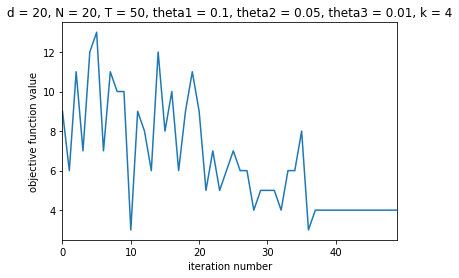

In [67]:
show_plt_k(results, 20, 20, 50, 0.1, 0.05, 0.01, 4)